<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

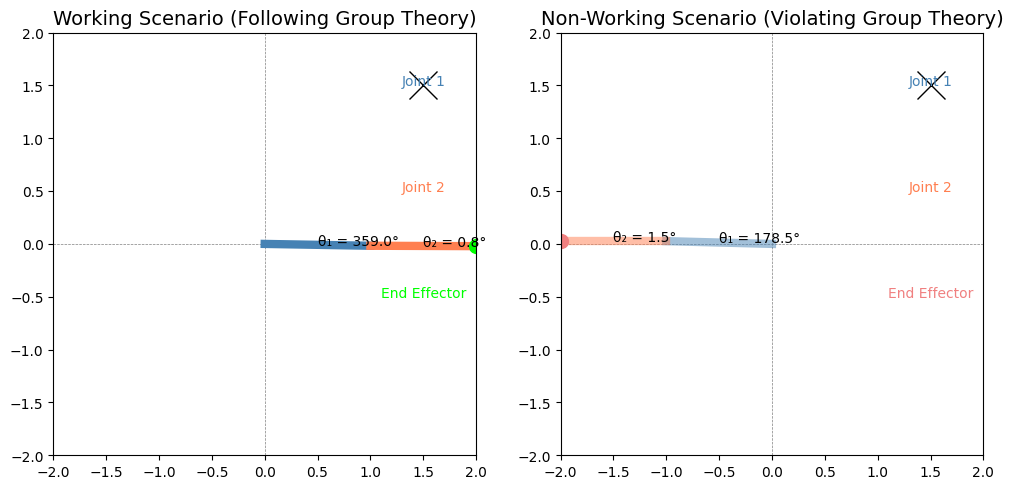

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Parameters for lengths of robotic arm segments
joint1_length = 1.0  # Length of the first arm segment
joint2_length = 1.0  # Length of the second arm segment
target_position = (1.5, 1.5)  # Fixed target position for the arm to reach

# Function to compute the end effector position given joint angles
def compute_end_effector_position(theta1, theta2):
    x1 = joint1_length * np.cos(np.radians(theta1))
    y1 = joint1_length * np.sin(np.radians(theta1))
    x2 = x1 + joint2_length * np.cos(np.radians(theta1 + theta2))
    y2 = y1 + joint2_length * np.sin(np.radians(theta1 + theta2))
    return x1, y1, x2, y2

# Set up the figure and axes for the plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Two plots side by side for the scenarios
for a in ax:
    a.set_xlim(-2, 2)
    a.set_ylim(-2, 2)
    a.axhline(0, color='gray', linewidth=0.5, linestyle='dashed')
    a.axvline(0, color='gray', linewidth=0.5, linestyle='dashed')
    a.set_aspect('equal', adjustable='box')  # Keep aspect ratio equal

# Working scenario
ax[0].set_title('Working Scenario (Following Group Theory)', fontsize=14)
line1_working, = ax[0].plot([], [], 'steelblue', lw=6, label='Joint 1')
line2_working, = ax[0].plot([], [], 'coral', lw=6, label='Joint 2')
end_effector_working, = ax[0].plot([], [], 'lime', markersize=10, label='End Effector', marker='o')
angle_text1_working = ax[0].text(0, 0, '', fontsize=10, color='black')
angle_text2_working = ax[0].text(0, 0, '', fontsize=10, color='black')

# Non-working scenario
ax[1].set_title('Non-Working Scenario (Violating Group Theory)', fontsize=14)
line1_non_working, = ax[1].plot([], [], 'steelblue', lw=6, label='Joint 1', alpha=0.5)
line2_non_working, = ax[1].plot([], [], 'coral', lw=6, label='Joint 2', alpha=0.5)
end_effector_non_working, = ax[1].plot([], [], 'lightcoral', markersize=10, label='End Effector', marker='o')
angle_text1_non_working = ax[1].text(0, 0, '', fontsize=10, color='black')
angle_text2_non_working = ax[1].text(0, 0, '', fontsize=10, color='black')

# Plotting the target
for a in ax:
    a.plot(target_position[0], target_position[1], 'kx', markersize=20, label='Target')  # Target in both scenarios

# Labels for joints and end effector at top right corner
ax[0].text(1.5, 1.5, 'Joint 1', fontsize=10, color='steelblue', ha='center')
ax[0].text(1.5, 0.5, 'Joint 2', fontsize=10, color='coral', ha='center')
ax[0].text(1.5, -0.5, 'End Effector', fontsize=10, color='lime', ha='center')

ax[1].text(1.5, 1.5, 'Joint 1', fontsize=10, color='steelblue', ha='center')
ax[1].text(1.5, 0.5, 'Joint 2', fontsize=10, color='coral', ha='center')
ax[1].text(1.5, -0.5, 'End Effector', fontsize=10, color='lightcoral', ha='center')

# Animation function: initialize
def init():
    line1_working.set_data([], [])
    line2_working.set_data([], [])
    end_effector_working.set_data([], [])
    angle_text1_working.set_text('')
    angle_text2_working.set_text('')

    line1_non_working.set_data([], [])
    line2_non_working.set_data([], [])
    end_effector_non_working.set_data([], [])
    angle_text1_non_working.set_text('')
    angle_text2_non_working.set_text('')

    return (line1_working, line2_working, end_effector_working, angle_text1_working, angle_text2_working,
            line1_non_working, line2_non_working, end_effector_non_working, angle_text1_non_working, angle_text2_non_working)

# Animation function: update for each frame
def animate(frame):
    # Working Scenario: Move to reach target position
    theta1_working = frame % 360  # Joint 1 moves freely in a circular motion
    # Joint 2 will stay within 0° to 90° to ensure it doesn't bend backward
    theta2_working = 90 * np.sin(np.radians(theta1_working/2))  # Gentle change to stay realistic

    x1_w, y1_w, x2_w, y2_w = compute_end_effector_position(theta1_working, theta2_working)

    line1_working.set_data([0, x1_w], [0, y1_w])  # From base to Joint 1
    line2_working.set_data([x1_w, x2_w], [y1_w, y2_w])  # From Joint 1 to Joint 2
    end_effector_working.set_data([x2_w], [y2_w])  # End effector position

    # Update angle text positions for the working scenario
    angle_text1_working.set_position((x1_w / 2, y1_w / 2))
    angle_text1_working.set_text(f'θ₁ = {theta1_working:.1f}°')

    angle_text2_working.set_position((x1_w + (joint2_length / 2) * np.cos(np.radians(theta1_working + theta2_working)),
                                       y1_w + (joint2_length / 2) * np.sin(np.radians(theta1_working + theta2_working))))
    angle_text2_working.set_text(f'θ₂ = {theta2_working:.1f}°')

    # Non-Working Scenario: Intentionally generating a configuration failure
    theta1_non_working = (frame * 1.5) % 360  # Joint 1 moves in a circle

    # Calculate theta2_non_working
    theta2_non_working = 180 - theta1_non_working

    x1_nw, y1_nw, x2_nw, y2_nw = compute_end_effector_position(theta1_non_working, theta2_non_working)

    line1_non_working.set_data([0, x1_nw], [0, y1_nw])  # From base to Joint 1
    line2_non_working.set_data([x1_nw, x2_nw], [y1_nw, y2_nw])  # From Joint 1 to Joint 2
    end_effector_non_working.set_data([x2_nw], [y2_nw])  # End effector position for non-working

    # Check if the actual distance exceeds the configured lengths
    distance_to_target = np.sqrt((x2_nw - target_position[0])**2 + (y2_nw - target_position[1])**2)
    if distance_to_target > (joint1_length + joint2_length + 0.1):  # More than the full reachability
        end_effector_non_working.set_color('lightcoral')  # Change color to indicate error
    else:
        end_effector_non_working.set_color('lime')  # Reset to valid color if successful

    # Update angle text positions for non-working scenario
    angle_text1_non_working.set_position((x1_nw / 2, y1_nw / 2))
    angle_text1_non_working.set_text(f'θ₁ = {theta1_non_working:.1f}°')

    angle_text2_non_working.set_position((x1_nw + (joint2_length / 2) * np.cos(np.radians(theta1_non_working + theta2_non_working)),
                                           y1_nw + (joint2_length / 2) * np.sin(np.radians(theta1_non_working + theta2_non_working))))
    angle_text2_non_working.set_text(f'θ₂ = {theta2_non_working:.1f}°')

    return (line1_working, line2_working, end_effector_working, angle_text1_working, angle_text2_working,
            line1_non_working, line2_non_working, end_effector_non_working, angle_text1_non_working, angle_text2_non_working)

# Create and run the animation
ani = FuncAnimation(fig, animate, frames=np.arange(0, 360, 1), init_func=init, blit=True, interval=50)

# Display the animation using HTML5 video
HTML(ani.to_jshtml())

# Saving to an HTML file
with open('robotic_arm_animation.html', 'w') as f:
    f.write(HTML(ani.to_jshtml()).data)  # Save the HTML content

# Allow downloading the HTML file
from google.colab import files
files.download('robotic_arm_animation.html')

# Export as HTML5 Video
#ani.save('robotic_arm_animation.html', writer='html')

# Export as GIF (using pillow writer)
#ani.save('robotic_arm_animation.gif', writer='pillow')
